### Part I

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
order_df=pd.read_csv("./Orders.csv")

In [3]:
order_df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
order_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [4]:
#remove , and $ from Profit and Sales
order_df.loc[:,'Profit']=order_df.loc[:,'Profit'].str.replace("$","").str.replace(",","")
order_df.loc[:,'Sales']=order_df.loc[:,'Sales'].str.replace("$","").str.replace(",","")

In [5]:
#change Profit and Sales to numeric type
order_df[['Profit','Sales']] = order_df[['Profit','Sales']].apply(pd.to_numeric)

In [6]:
#change date to date type
order_df['Order.Date']=pd.to_datetime(order_df['Order.Date'],format="%m/%d/%y")

In [7]:
#add two columns - season and month
order_df['month']=[i.month for i in order_df["Order.Date"]]
temp=order_df['month'].replace([1,2,12],'Winter').replace([3,4,5],'Spring').replace([6,7,8],'Summer').replace([9,10,11],'Autumn')
order_df['season']=temp

In [8]:
order_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month', 'season'],
      dtype='object')

In [9]:
#question 2.1
seasonal_df=order_df[['season','Quantity']]
seasonal_df=seasonal_df.groupby('season')['Quantity'].sum()
seasonal_df

season
Autumn    59161
Spring    34052
Summer    46651
Winter    38448
Name: Quantity, dtype: int64

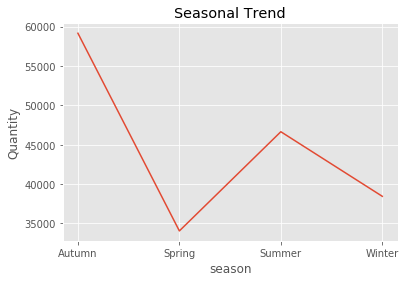

In [10]:
plt.plot(seasonal_df)
plt.title('Seasonal Trend')
plt.xlabel('season')
plt.ylabel('Quantity')
plt.show()

In [11]:
#Question 2.2
inv_df=order_df[['Sub.Category','season','Quantity']]
inv_df=inv_df.groupby(['Sub.Category','season']).agg({'Quantity':['sum']})
inv_df=inv_df.stack().reset_index()
inv_df.drop('level_2',axis=1,inplace=True)

In [15]:
inv_df.columns

Index(['Sub.Category', 'season', 'Quantity'], dtype='object')

In [12]:
# the bar location
ind = np.arange(0,34,2) #for 17 Sub Categories
width=0.2

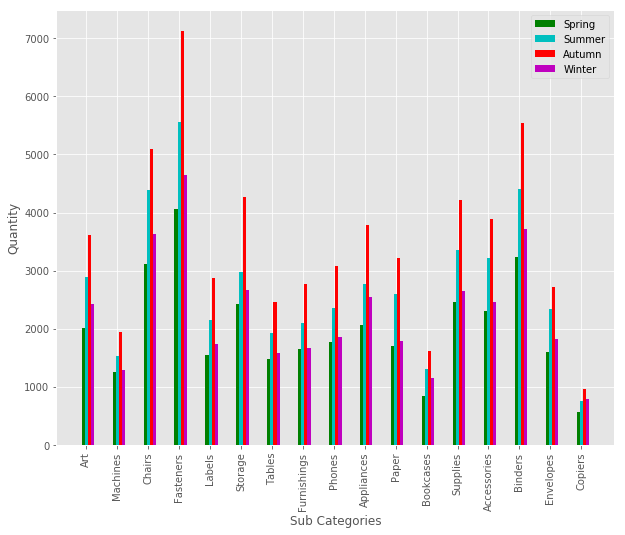

In [16]:
#bar(left, height, width, color, align, yerr)
plt.figure(figsize=(10,8))
Spring=list(inv_df[inv_df['season']=='Spring'].Quantity)
Summer=list(inv_df[inv_df['season']=='Summer'].Quantity)
Autumn=list(inv_df[inv_df['season']=='Autumn'].Quantity)
Winter=list(inv_df[inv_df['season']=='Winter'].Quantity)
plt.bar(ind,Spring,width,color='g',label='Spring')
plt.bar(ind+width,Summer,width,color='c',label='Summer')
plt.bar(ind+2*width,Autumn,width,color='r',label='Autumn')
plt.bar(ind+3*width,Winter,width,color='m',label='Winter')
plt.legend(loc="upper right")
plt.xlabel('Sub Categories')
plt.ylabel('Quantity')
plt.xticks(ind + width, set(inv_df['Sub.Category']),rotation=90)
plt.show()

In [38]:
#Q3
#read returns csv file
return_df=pd.read_csv("./data/Returns.csv")

In [39]:
return_df.columns=return_df.columns.str.replace(' ','.')
return_df.columns

Index(['Returned', 'Order.ID', 'Region'], dtype='object')

In [399]:
#join return and order tables
join_df=order_df.merge(return_df,how="inner",on="Order.ID",suffixes=['_O', '_R'])

In [401]:
join_df.columns
join_df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,season,Returned,Region_R
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.16,2,0.0,720.36,725.57,Critical,12,Winter,Yes,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.50,5,0.0,153.75,627.27,Critical,12,Winter,Yes,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1356.03,3,0.0,311.85,458.97,Critical,12,Winter,Yes,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,882.15,5,0.0,114.60,203.92,Critical,12,Winter,Yes,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,148.32,3,0.0,68.22,25.48,Critical,12,Winter,Yes,Eastern Asia


In [299]:
join_df['year']=[i.year for i in join_df["Order.Date"]]
profit_df=join_df[['Profit','year']]
gbprofit=profit_df.groupby('year')['Profit'].sum()
gbprofit=gbprofit_df.stack().reset_index()
gbprofit.drop('level_1',axis=1,inplace=True)
gbprofit.rename(columns={0:'Profit'},inplace=True)
gbprofit['Profit']=gbprofit['Profit'].astype(np.int)

In [148]:
gbprofit

,year,Profit
0,2012,17477
1,2013,9269
2,2014,17510
3,2015,17112


Text(0,0.5,'Profit')

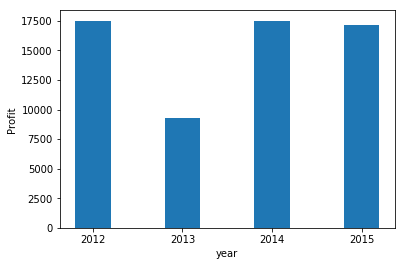

In [241]:
position=np.arange(4)
plt.bar(position,gbprofit['Profit'],0.4)
plt.xticks(position, gbprofit['year'])
plt.xlabel('year')
plt.ylabel('Profit')

In [409]:
#Q3.2
returntime=pd.DataFrame(join_df.groupby('Customer.ID')['Returned'].count())
returntime=returntime.stack().reset_index()
returntime.drop('level_1',axis=1,inplace=True)
returntime.rename(columns={0:'count'},inplace=True)
mtonce=returntime[returntime['count']>1]
mtfive=returntime[returntime['count']>5]
print ("%d customer returned more than once" % len(mtonce))
print ("%d costomer returned more than five times" % len(mtfive))

547 customer returned more than once
46 costomer returned more than five times


In [250]:
#Q3.3
return_region=pd.DataFrame(return_df.groupby('Region')['Order.ID'].count())
return_region=return_region.stack().reset_index()
return_region.drop('level_1',axis=1,inplace=True)
return_region.rename(columns={0:'count'},inplace=True)
return_region['count']=return_region['count'].astype('int')
rtop10=return_region.sort_values(by=['count'],axis=0,ascending=False).head(10)

Text(0,0.5,'Region')

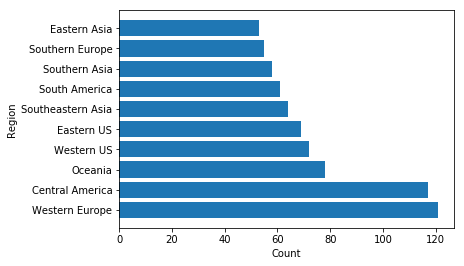

In [251]:
x3=rtop10['Region']
y3=rtop10['count']
plt.barh(x3,y3)
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

In [252]:
#Q3.4
cat_return=pd.DataFrame(join_df.groupby('Sub.Category')['Order.ID'].count())
cat_return=cat_return.stack().reset_index()
cat_return.drop('level_1',axis=1,inplace=True)
cat_return.rename(columns={0:'count'},inplace=True)
cat_return['count']=cat_return['count'].astype('int')
ctop10=cat_return.sort_values(by=['count'],axis=0,ascending=False).head(10)

Text(0,0.5,'Sub Category')

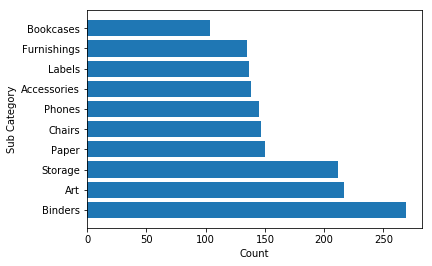

In [255]:
x4=ctop10['Sub.Category']
y4=ctop10['count']
plt.barh(x4,y4)
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.show()

## Part II

In [319]:
joinall_df=order_df.merge(return_df,how="outer",on="Order.ID",suffixes=['_O', '_R'])
len(joinall_df)

51290

In [320]:
joinall_df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,season,Returned,Region_R
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.77,High,11,Autumn,NaN,NaN
1,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,341.96,2,0.0,54.71,25.27,High,11,Autumn,NaN,NaN
2,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.63,Critical,2,Winter,NaN,NaN
3,26339,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,344.68,2,0.1,34.42,65.35,Critical,2,Winter,NaN,NaN
4,26340,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,133.92,5,0.1,-6.03,41.64,Critical,2,Winter,NaN,NaN


In [323]:
joinall_df['Ship.Date']=pd.to_datetime(joinall_df['Ship.Date'],format="%m/%d/%y")
Process_Time=joinall_df['Ship.Date']-joinall_df['Order.Date']
joinall_df['Process.Time']=Process_Time
joinall_df['Process.Time']=[i.days for i in joinall_df['Process.Time']]

In [325]:
joinall_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_O', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month', 'season',
       'Returned', 'Region_R', 'Process.Time'],
      dtype='object')

In [340]:
joinall_df['Returned']=joinall_df['Returned'].fillna('No')

In [352]:
pro_return=pd.DataFrame(joinall_df.groupby('Product.ID')['Order.ID'].count())
pro_return=pro_return.stack().reset_index()
pro_return.drop('level_1',axis=1,inplace=True)
pro_return.rename(columns={0:'return.count'},inplace=True)

In [354]:
joinall_df=joinall_df.merge(pro_return,how="outer",on="Product.ID")

In [358]:
joinall_df['return.count']=joinall_df['return.count'].fillna(0)

In [359]:
joinall_df

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Discount,Profit,Shipping.Cost,Order.Priority,month,season,Returned,Region_R,Process.Time,return.count
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.00,62.15,40.7700,High,11,Autumn,No,NaN,2,2
1,36383,CA-2013-KN16390140-41338,2013-03-05,2013-03-09,Standard Class,KN-163901406,Katherine Nockton,Corporate,19120.0,Philadelphia,...,0.40,-93.23,32.9800,Medium,3,Spring,No,NaN,4,2
2,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.00,54.71,25.2700,High,11,Autumn,No,NaN,2,4
3,39335,CA-2015-JC15775140-42186,2015-07-01,2015-07-03,Second Class,JC-157751404,John Castell,Consumer,90032.0,Los Angeles,...,0.15,5.13,52.1200,High,7,Summer,No,NaN,2,4
4,33020,US-2013-KD16345140-41628,2013-12-20,2013-12-25,Standard Class,KD-163451402,Katherine Ducich,Consumer,60623.0,Chicago,...,0.30,-71.81,22.1800,Medium,12,Winter,No,NaN,5,4
5,34662,CA-2012-LC17050140-40940,2012-02-01,2012-02-03,First Class,LC-170501404,Liz Carlisle,Consumer,92691.0,Mission Viejo,...,0.15,3.42,54.6400,High,2,Winter,No,NaN,2,4
6,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.10,-288.77,923.6300,Critical,2,Winter,No,NaN,2,25
7,21264,IN-2015-MB173057-42179,2015-06-24,2015-06-28,Standard Class,MB-173057,Maria Bertelson,Consumer,NaN,Sydney,...,0.10,-96.26,92.2300,Medium,6,Summer,No,NaN,4,25
8,4116,MX-2014-CM1271582-41885,2014-09-03,2014-09-05,First Class,CM-1271582,Craig Molinari,Corporate,NaN,Cancún,...,0.20,232.00,328.6590,Critical,9,Autumn,No,NaN,2,25
9,30218,ID-2015-MM1726078-42181,2015-06-26,2015-07-01,Standard Class,MM-1726078,Magdelene Morse,Consumer,NaN,Kuala Lumpur,...,0.00,82.26,222.7800,Medium,6,Summer,Yes,Southeastern Asia,5,25


In [360]:
joinall_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_O', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month', 'season',
       'Returned', 'Region_R', 'Process.Time', 'return.count'],
      dtype='object')

In [429]:
model_df=joinall_df[['Returned','Process.Time', 'return.count', 'Discount', 'Shipping.Cost','Region_O', 'Market', 'Segment','Sub.Category', 'Order.Priority','Sales', 'Quantity','month','Ship.Mode']]

In [430]:
model_df.head()

,Returned,Process.Time,return.count,Discount,Shipping.Cost,Region_O,Market,Segment,Sub.Category,Order.Priority,Sales,Quantity,month,Ship.Mode
0,No,2,2,0.00,40.77,Central US,USCA,Consumer,Phones,High,221.98,2,11,First Class
1,No,4,2,0.40,32.98,Eastern US,USCA,Corporate,Phones,Medium,466.16,7,3,Standard Class
2,No,2,4,0.00,25.27,Central US,USCA,Consumer,Bookcases,High,341.96,2,11,First Class
3,No,2,4,0.15,52.12,Western US,USCA,Consumer,Bookcases,High,436.00,3,7,Second Class
4,No,5,4,0.30,22.18,Central US,USCA,Consumer,Bookcases,Medium,359.06,3,12,Standard Class


In [374]:
def ReplaceWithDummies(df, dummylist):
    df2 = df.copy()
    for var in dummylist:
        topindex = df2[var].value_counts().sort_values(ascending=False).index[0]
        dummies = pd.get_dummies(df2[var], prefix=var)
        dummies = dummies.drop(var + "_" + str(topindex), axis=1)
        df2 = pd.concat([df2, dummies], axis=1)
        df2 = df2.drop(var, axis=1)
    return df2


In [431]:
dummylist=['Market', 'Sub.Category', 'Region_O','Segment','Order.Priority', 'month','Ship.Mode']
model_df=ReplaceWithDummies(model_df,dummylist)

In [432]:
model_df['Returned']= model_df['Returned'].str.replace("No","0").str.replace("Yes","1")
model_df['Returned']=model_df['Returned'].apply(pd.to_numeric)

In [433]:
model_df.columns

Index(['Returned', 'Process.Time', 'return.count', 'Discount', 'Shipping.Cost',
       'Sales', 'Quantity', 'Market_Africa', 'Market_Europe', 'Market_LATAM',
       'Market_USCA', 'Sub.Category_Accessories', 'Sub.Category_Appliances',
       'Sub.Category_Art', 'Sub.Category_Bookcases', 'Sub.Category_Chairs',
       'Sub.Category_Copiers', 'Sub.Category_Envelopes',
       'Sub.Category_Fasteners', 'Sub.Category_Furnishings',
       'Sub.Category_Labels', 'Sub.Category_Machines', 'Sub.Category_Paper',
       'Sub.Category_Phones', 'Sub.Category_Storage', 'Sub.Category_Supplies',
       'Sub.Category_Tables', 'Region_O_Canada', 'Region_O_Caribbean',
       'Region_O_Central Africa', 'Region_O_Central America',
       'Region_O_Central Asia', 'Region_O_Central US',
       'Region_O_Eastern Africa', 'Region_O_Eastern Asia',
       'Region_O_Eastern Europe', 'Region_O_Eastern US',
       'Region_O_North Africa', 'Region_O_Northern Europe', 'Region_O_Oceania',
       'Region_O_South America'

In [434]:
x=model_df[['Process.Time']].copy()
y=model_df[['Returned']]

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y)
residuals = y - lm.predict(x)
plt.hist(residuals)